# Données de l’OFSP sur le covid

L’OFSP actualise quotidiennement plusieurs tableaux de données sur le covid, listés [dans cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html). On va se plonger dans le premier.

In [1]:
import pandas as pd

# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques dans le notebook directement
%matplotlib inline

In [2]:
# on charge le fichier CSV directement sur le site de l’OFSP
df = pd.read_excel('https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_base%20de%20donn%C3%A9es_graphiques_COVID-19-rapport.xlsx', skiprows=6)

In [3]:
# notre index sera la date
df.index = pd.to_datetime( df['Date'] )

In [4]:
# on efface la colonne "date"
del df['Date']

In [5]:
# cibler les données de telle à telle date, puis faire la somme
df['2020-02-28':'2020-03-16']['Nombre de cas'].sum()

3752

In [6]:
df['2020-03-16':]['Nombre de cas'].sum()

40417

In [7]:
df[:'2020-09-02'].tail()

,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,
2020-08-29,214,42149,2,4389,0.0,1726.0
2020-08-30,144,42293,4,4393,1.0,1727.0
2020-08-31,344,42637,1,4394,1.0,1728.0
2020-09-01,325,42962,2,4396,1.0,1729.0
2020-09-02,165,43127,2,4398,1.0,1730.0


In [41]:
plt.style.use('fivethirtyeight')

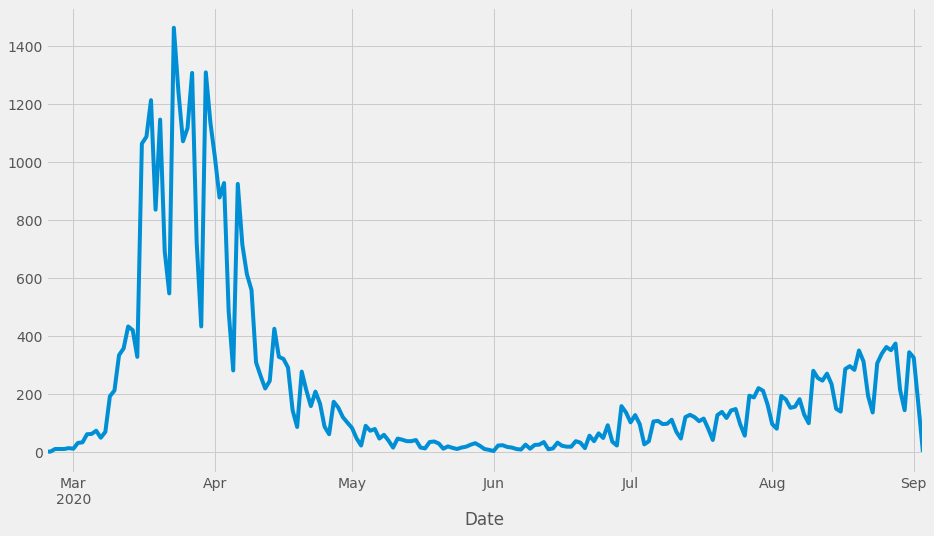

In [44]:
df['Nombre de cas'].plot(figsize=(14, 8))

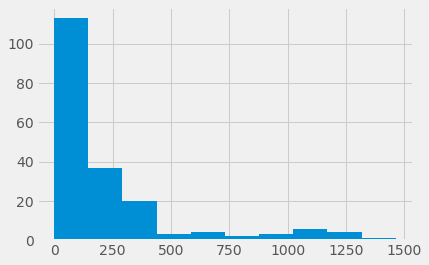

In [49]:
df['Nombre de cas'].hist(bins=10)

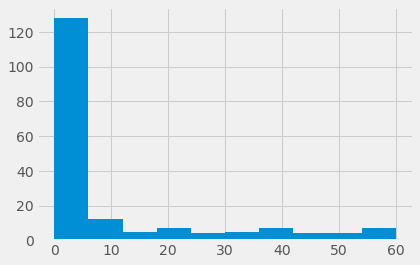

In [50]:
df['Nombre de décés'].hist(bins=10)

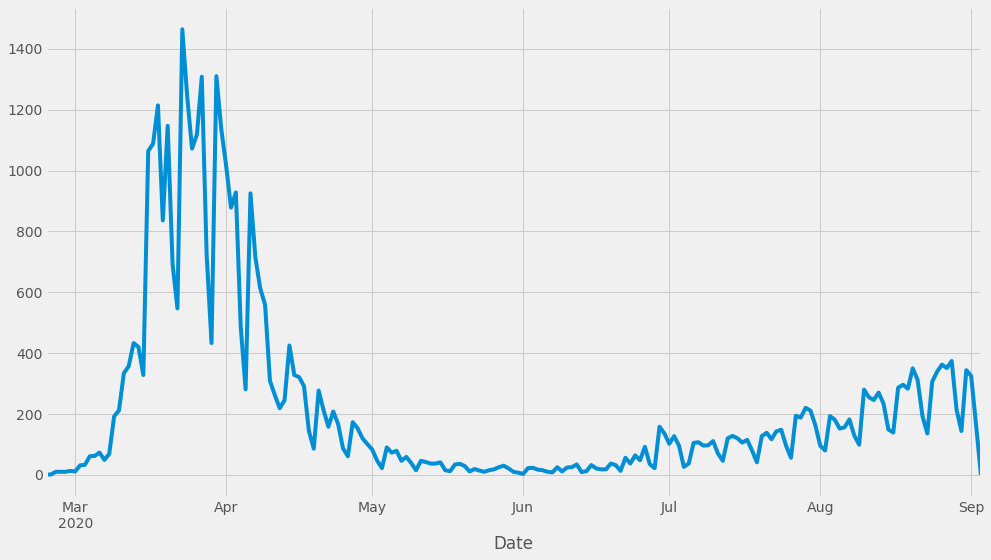

In [65]:
df['Nombre de cas'].plot(kind='line', figsize=(14, 8))
plt.tight_layout()
plt.savefig('export_graphique.pdf')

In [60]:
!open export_graphique.pdf

## Moyenne mobile = rolling average

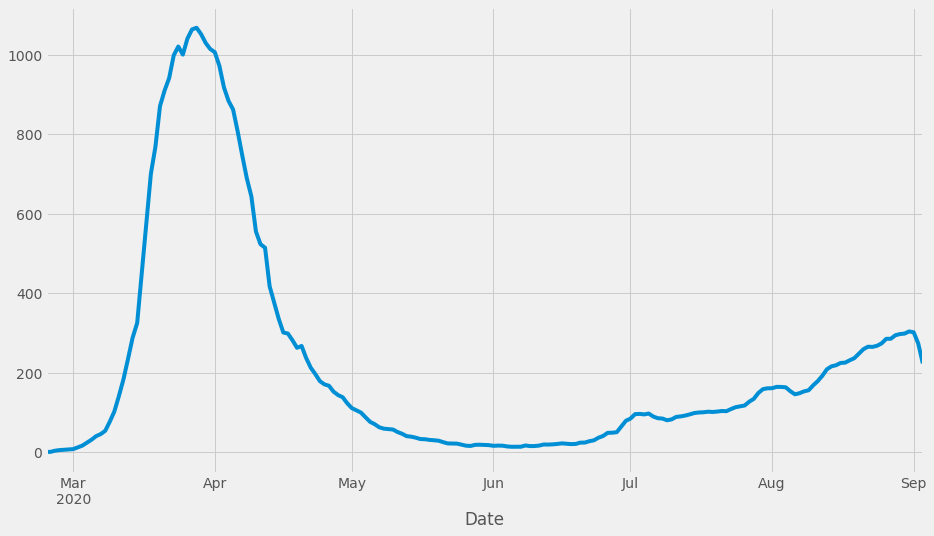

In [64]:
df['Nombre de cas'].rolling('7d').mean().plot(figsize=(14, 8))

In [70]:
df['Nombre de cas'].resample('W', label='left', loffset=pd.DateOffset(days=1)).sum()

Date
2020-02-24      56
2020-03-02     378
2020-03-09    2276
2020-03-16    6589
2020-03-23    7362
2020-03-30    6036
2020-04-06    3602
2020-04-13    1840
2020-04-20    1171
2020-04-27     699
2020-05-04     401
2020-05-11     230
2020-05-18     153
2020-05-25     126
2020-06-01      98
2020-06-08     140
2020-06-15     171
2020-06-22     354
2020-06-29     682
2020-07-06     632
2020-07-13     710
2020-07-20     824
2020-07-27    1152
2020-08-03    1092
2020-08-10    1573
2020-08-17    1856
2020-08-24    2090
2020-08-31     834
Freq: W-MON, Name: Nombre de cas, dtype: int64